# Homework 7. K-means and Recommendation system

***Double Click here to edit this cell***

- Name: 윤다영
- Student ID: 202002265

## Problem 1 (10 pts): K-means

- We want to cluster data in sample_data_1.csv
- Estimate the best k for sample_data_1.csv
- You must show the process to find the best k
- use `sklearn.cluster.KMeans`
- Your KMeans randomstate must be: `random_state=0`

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

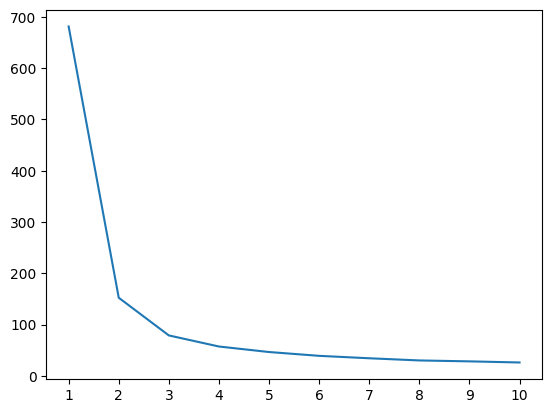

In [2]:
# YOUR CODE HERE. You may use as many code cells as you want.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
with open('sample_data_1.csv', 'r') as rf:
  X = np.loadtxt(rf, delimiter = ",")
distance = []
for i in range(1, 11):
  km = KMeans(n_clusters=i, random_state=0)
  km.fit(X)
  distance.append(km.inertia_)
plt.plot(range(1, 11), distance)
plt.xticks((range(1, 11)))
plt.show()

### Your conclusion:
```
To edit, double-click here

hyperparameter k가 커질수록 distance의 합은 계속 줄어들게 된다. 하지만 k가 무작정 크다
고 해서 항상 좋은 결과를 얻지 못하므로 k가 커지는 것에 대한 penalty가 필요함을 깨닫게 되었
다.
```

## Problem 2 (40 pts): K-means implementation

- Make your own implementaion of K-means algorithm
- If the sum of distances between previous centroids and current centroids is less than or equal to `EPSILON`, K-means stops.
- If K-means algorithm reaches the maximum number of iterations `max_iter`, it stops.
- In `fit` method, you must run k-means in `n_init` times with different centroid seeds. Then choose the best.
- `fit` method computes centroids and labels and stores them in `self.cluster_centers_` and `self.labels_`
- `predict` method returns the centroids closest to each point in `X`
- `score` method returns **the negative of** the sum of sqaured distances between each point in `X` and the centroid closest to the point.

In [6]:
import numpy as np

class MyKMeans:
#"""performs k-means clustering using numpy"""

  def __init__(self, n_clusters=8, n_init=10, EPSILON=1e-4, max_iter=300, random_state=0):
    self.n_clusters = n_clusters # number of clusters
    self.n_init = n_init # number of time the k-means algorithm will be run with
    self.EPSILON = EPSILON # EPSILON; stop if the sum of centroid movements <= EPSI
    self.max_iter = max_iter # maximum number of iterations
    self.random_state = random_state # random number seed
    self.cluster_centers_ = None # means of clusters
    self.labels_ = None # X's assignments to clusters

  def fit(self, X):
    X = X.astype(float)
    labels = []
    centers = []
    for i in range(self.n_init): # seed 반복해서 바꾸기
      np.random.seed(i + self.random_state)
      r_center = np.array([])
      r_center = X[np.random.choice(len(X),self.n_clusters, replace=False)] # 1차 center들
      for j in range(self.max_iter): # new centroid
        label = []
        for x in X: # clustering
          tmp = []
          for c in r_center:
            tmp.append(np.dot(x - c, x - c))
          label.append(np.argmin(tmp))
        tmp = []
        new_center = []
        label = np.array(label)
        # 같은 group인거 다 모아서 평균 내고 그거 new에 담기
        for c in range(self.n_clusters):
          tmp = X[[label == c]]
          new_center.append(tmp.mean(axis = 0))
        E = 0
        for r in range(self.n_clusters):
          E += np.linalg.norm(new_center[r]-r_center[r])
        if E <= self.EPSILON:
          centers.append(new_center) #iter중 최고 넣기
          labels.append(label)
          break
        else:
          r_center = new_center
    s = []
    for i in range(self.n_init): # 최상의 center 고르기
      self.cluster_centers_ = centers[i]
      self.labels_ = labels[i]
      s.append(self.score(X))
    self.cluster_centers_ = np.array(centers[np.argmax(s)])
    self.labels_ = np.array(labels[np.argmax(s)])
    return self
  def predict(self, X):
    X = X.astype(float)
    # FILL OUT
    p_label = []
    for i in range(len(X)):
      x = np.array(X[i])
      tmp = []
      for c in self.cluster_centers_:
        tmp.append(np.linalg.norm(c - x))
      p_label.append(np.argmin(tmp))
    return np.array(p_label)

  def score(self, X):
    X = X.astype(float)
    # FILL OUT
    s_label = np.array(self.labels_)
    s = 0
    for i in range(self.n_clusters):
      x = X[[s_label == i]]
      c = np.array(self.cluster_centers_[i])
      for k in x:
        s += sum((c - k)**2)
    return -1 * s

### Run the following code:

In [7]:
# DO NOT EDIT
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

kmeans = MyKMeans(n_clusters=2).fit(X)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
print(kmeans.score(X))

[[10.  2.]
 [ 1.  2.]]
[1 1 1 0 0 0]
-16.0


<ipython-input-6-f0962664139e>:35: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  tmp = X[[label == c]]
<ipython-input-6-f0962664139e>:72: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x = X[[s_label == i]]


### Your output must be the following:

```
[[10.  2.]
 [ 1.  2.]]
[1 1 1 0 0 0]
-16.0
```
or
```
[[ 1.  2.]
 [10.  2.]]
[0 0 0 1 1 1]
-16.0
```

### Run the following code:

In [8]:
# DO NOT EDIT
%matplotlib inline

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

with open('sample_data_2.csv', 'r') as rf:  # some windows systems: with open('sample_data_2.csv', 'rb') as rf:
    X2 = np.loadtxt(rf, delimiter = ",")

ks3 = range(1, 21)
%time errors3 = [-MyKMeans(n_clusters=k, n_init=10).fit(X2).score(X2) for k in ks3]

<ipython-input-6-f0962664139e>:35: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  tmp = X[[label == c]]
<ipython-input-6-f0962664139e>:72: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x = X[[s_label == i]]


CPU times: user 3min 48s, sys: 2.21 s, total: 3min 50s
Wall time: 3min 52s


### Your code will be graded based on the correctness and the performance
### My implementation result:
Linux
```
CPU times: user 4.18 s, sys: 3.92 ms, total: 4.18 s
```
Windows
```
Wall time: 4.04 s
```

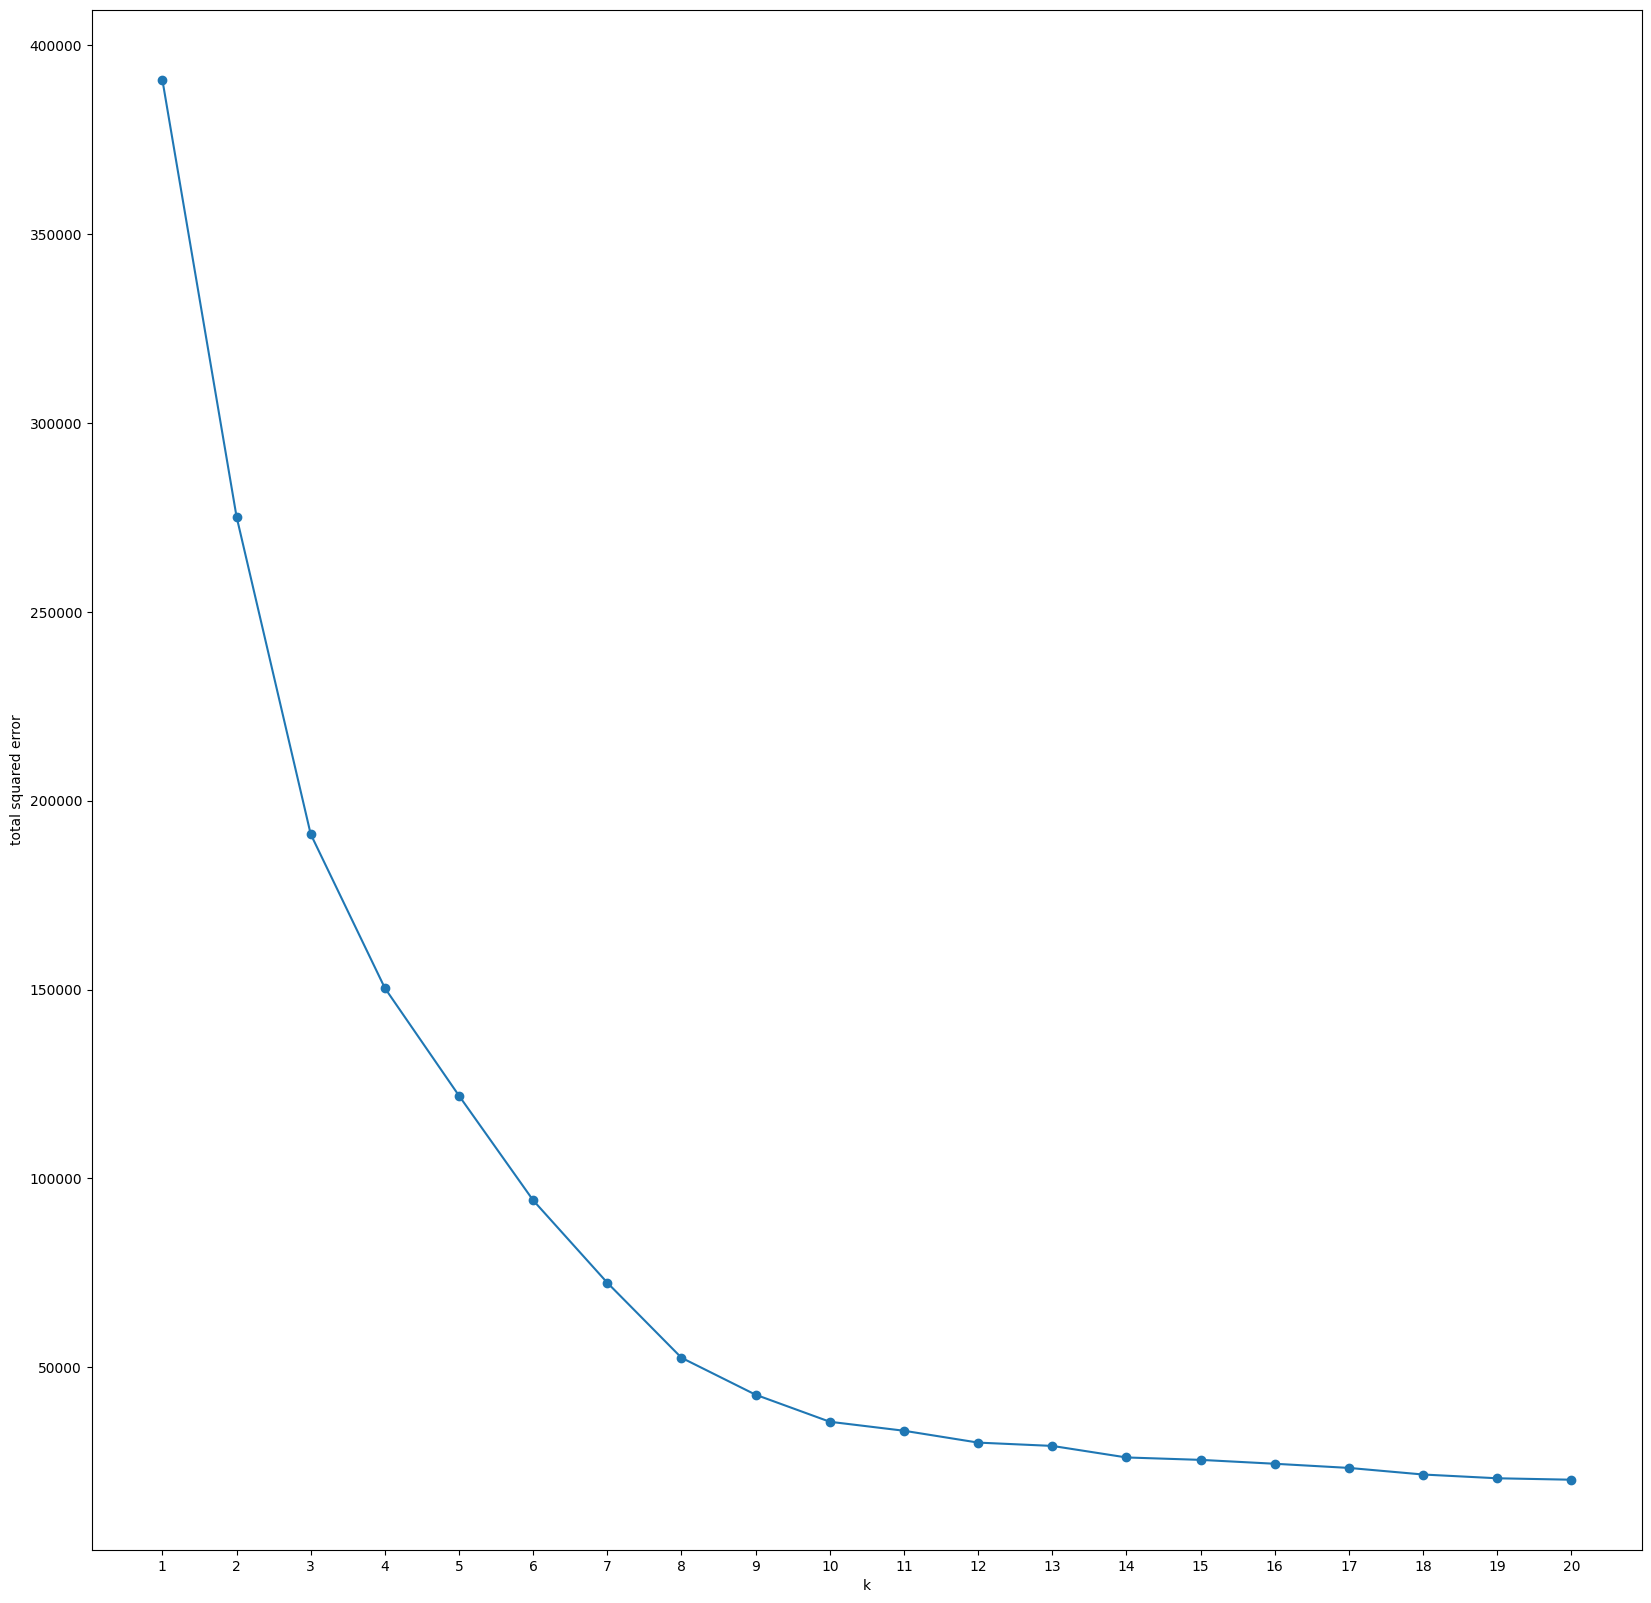

In [9]:
# DO NOT EDIT
plt.figure(figsize=(20,20))
plt.plot(ks3, errors3, '-o')
plt.xticks(ks3)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.show()

### Your output must be similar to the following:
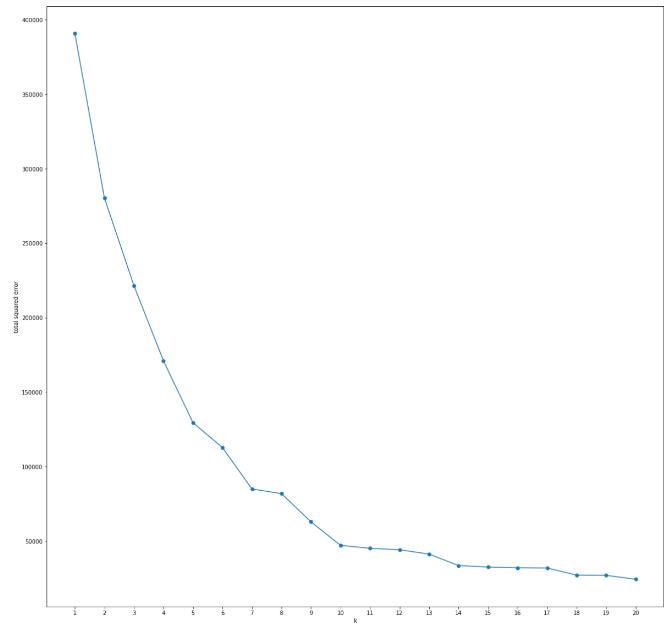

## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit

- Run **all cells** after restarting the kernel
- Goto "File -> Print Preview"
- Print the page as pdf
- Pdf file name must be in a form of: homework_7_홍길동_202200001.pdf
- Submit the pdf file in google classroom
- No late homeworks will be accepted
- Your homework will be graded on the basis of correctness and programming skills